Gregory Ollivierre - 03717357 - Comp6940 Assignment1

import libraries from python

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

lets import the required dataset and have a look at some at it characteristics

In [3]:
# "df" will house the pandas dataframe of interest
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Looks like we do indeed have some survey data. lets see its shape

In [4]:
df.shape

(1259, 27)

so we have 1259 rows and 27 columns. Lets check the datatypes of each column to look for any non numerical stuff

In [5]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

So we see that this makes sense, since its largely survey data and people would have answers that are non numeric. This also means that a function like df.describe will only give us info on the Age column since its numeric. If we want the description of the other columns we should drop the Age column first and view it seperately.

In [6]:
df.drop("Age",axis=1).describe()

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:54:11,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


We can see a number of columns have missing data since their count does not match the 1259 rows expected. The gender response also looks odd since there are 49 unique genders? (not even in the 21st century). Lets look deeper at gender

In [6]:
set(list(df["Gender"]))

{'A little about you',
 'Agender',
 'All',
 'Androgyne',
 'Cis Female',
 'Cis Male',
 'Cis Man',
 'Enby',
 'F',
 'Femake',
 'Female',
 'Female ',
 'Female (cis)',
 'Female (trans)',
 'Genderqueer',
 'Guy (-ish) ^_^',
 'M',
 'Mail',
 'Make',
 'Mal',
 'Male',
 'Male ',
 'Male (CIS)',
 'Male-ish',
 'Malr',
 'Man',
 'Nah',
 'Neuter',
 'Trans woman',
 'Trans-female',
 'Woman',
 'cis male',
 'cis-female/femme',
 'f',
 'femail',
 'female',
 'fluid',
 'm',
 'maile',
 'male',
 'male leaning androgynous',
 'msle',
 'non-binary',
 'ostensibly male, unsure what that really means',
 'p',
 'queer',
 'queer/she/they',
 'something kinda male?',
 'woman'}

OK that got wierd really quick....gender does not seem to play a prominent role in the assignment so we shall move on

In [7]:
# lets not forget to look at "Age"
df["Age"].describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

Those values look wierd...but lets leave it for now.

## Question 2: Lets answer the second question and have a look at the distribution of the ages

ok that mean from the age description looks quite wierd so lets look at a box plot to see if there are any outliers.

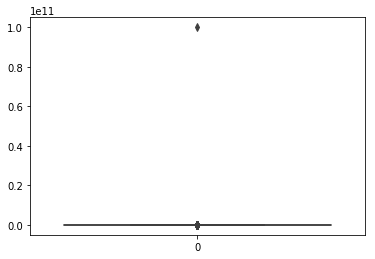

In [6]:
sns.boxplot(data=df['Age'])

Ok so this box plot look really wierd and implies a big outlier. Lets looks at some other decriptors.

In [7]:
df['Age'].median()

31.0

ok so the median and the mean are very different. Lets see if we cant fix that. Lets check who is over the age of 100 or less that 1....though I admit asking a 1 yr old to take a survey about mental illness would be quite wierd :)

In [8]:
df['Age'][(df['Age']>100) | (df['Age']<1)]

143             -29
364             329
390     99999999999
715           -1726
1127             -1
Name: Age, dtype: int64

so 5 rows have wierd ages since a negative age is impossible as ar those >100. We could replace them with the meadian age or drop those rows. Since i dont know anything else about the sample i'm choosing to drop the rows.

In [9]:
#using another dataframe incase we need to come back
df2 = df.drop([143,364,390,715,1127])
#lets check it worked
df2['Age'][(df2['Age']>100) | (df2['Age']<1)]
#it did

Series([], Name: Age, dtype: int64)

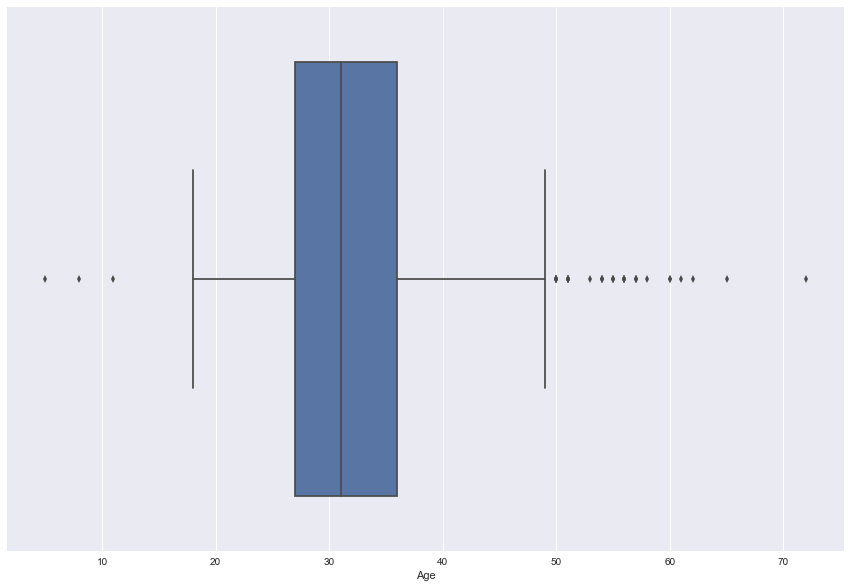

In [10]:
# now lets look at the box plot
plt.figure(figsize=(15,10))
sns.boxplot(x=df2['Age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A30F166320>]], dtype=object)

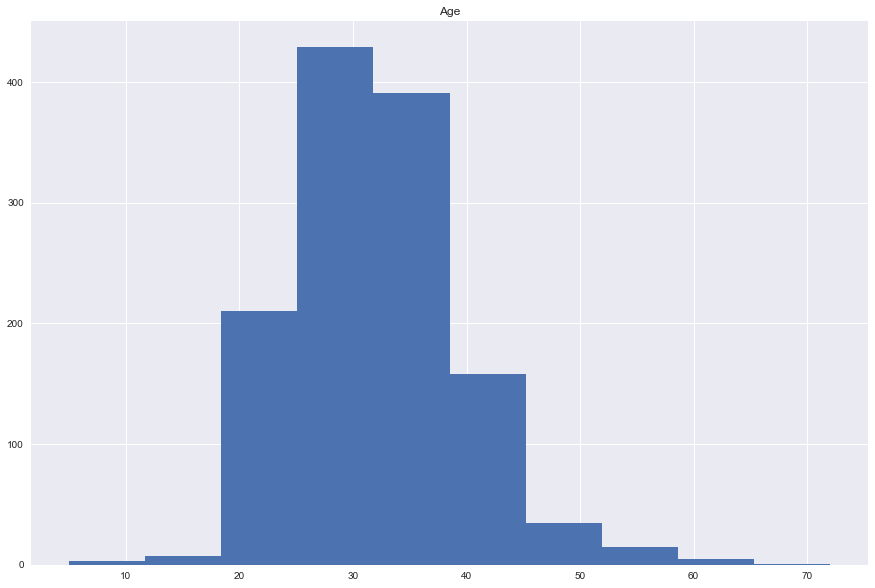

In [11]:
# lets look at the histogram for good measure
df2.hist(column='Age',figsize=(15,10))

ok so the boxplot and histogram now make much more sense. The distribution looks aproximately bell shaped with most ages tightly centered on the 25-35 age group.  The box plot specifically shows 

# Question 3 :   Top countries where mental health is prevalent
# It is assumed everyone has a mental health issue.

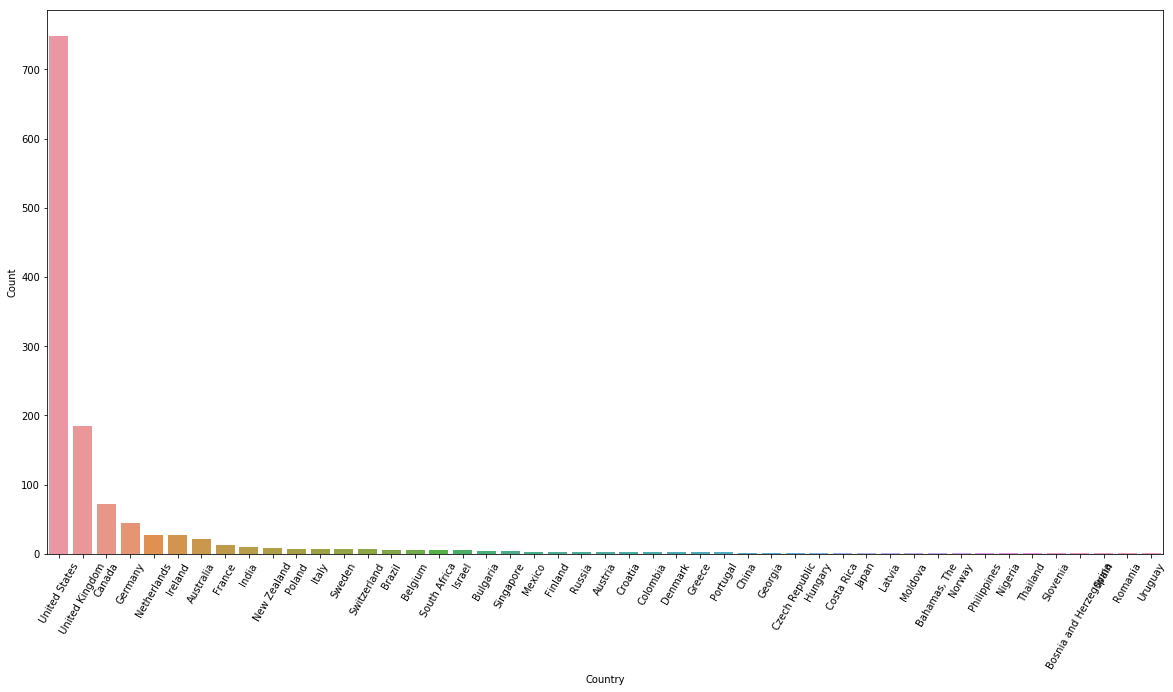

In [13]:
#outputting a distribution plot would look like.
tmp = df2[['Country','Age']].groupby('Country').count().sort_values('Age',ascending=False)
tmp.columns = ["Count"]
tmp = tmp.reset_index().sort_values('Count',ascending=False)
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)# since there are alot of countries
sns.barplot(x='Country',y='Count',data=tmp)

The united states is a clear winner

## Question 4 : People with mental health who have a family history with mental health

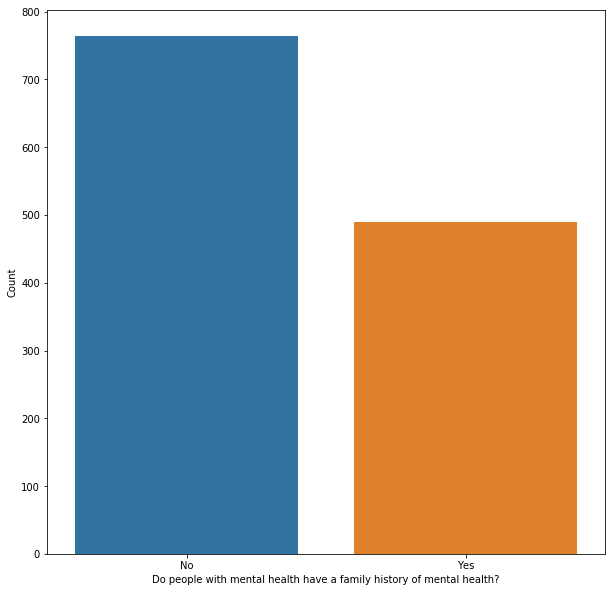

In [14]:
# if we groupby family history and count, then we can add up the total number of yes and no answers where respondents 
# were asked if they had a family history of mental health.
tmp = df2.groupby('family_history').count()['Age'].reset_index()
tmp.columns = ["Do people with mental health have a family history of mental health?","Count"]
plt.figure(figsize=(10,10))
sns.barplot(x='Do people with mental health have a family history of mental health?',y='Count',data=tmp)

so LESS people with mental health issues have a family history of mental health

## Question 5 : People with mental health who DONT have a family history with mental health

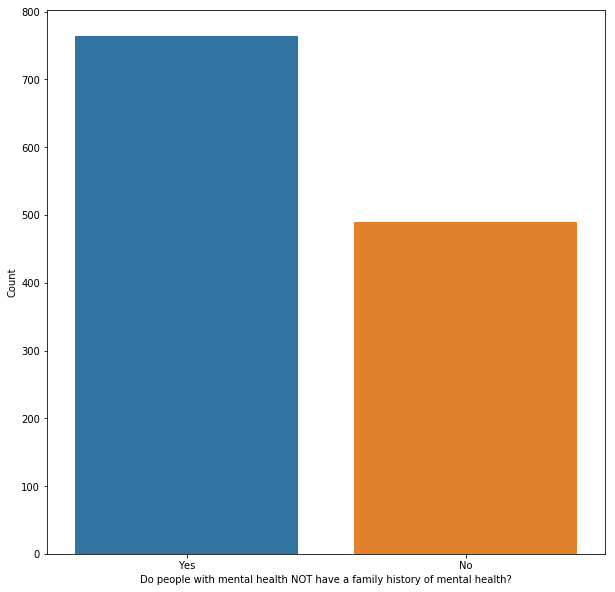

In [15]:
# if we groupby family history and count, then we can add up the total number of yes and no answers where respondents 
# were asked if they had a family history of mental health.
tmp = df2.groupby('family_history').count()['Age']
tmp.index = ['Yes', 'No'] # switch the answers so we can essentially negate the previous question
tmp = tmp.reset_index()
tmp.columns = ["Do people with mental health NOT have a family history of mental health?","Count"]
plt.figure(figsize=(10,10))
sns.barplot(x='Do people with mental health NOT have a family history of mental health?',y='Count',data=tmp)

so MORE people with mental illness dont have a family history of mental health.

## Question 6 : Do companies who employees feel take mental health as serious as physical health provide any benefits?

Text(0.5,0,'Do companies who employees feel take mental health as serious as physical health provide any benefits?')

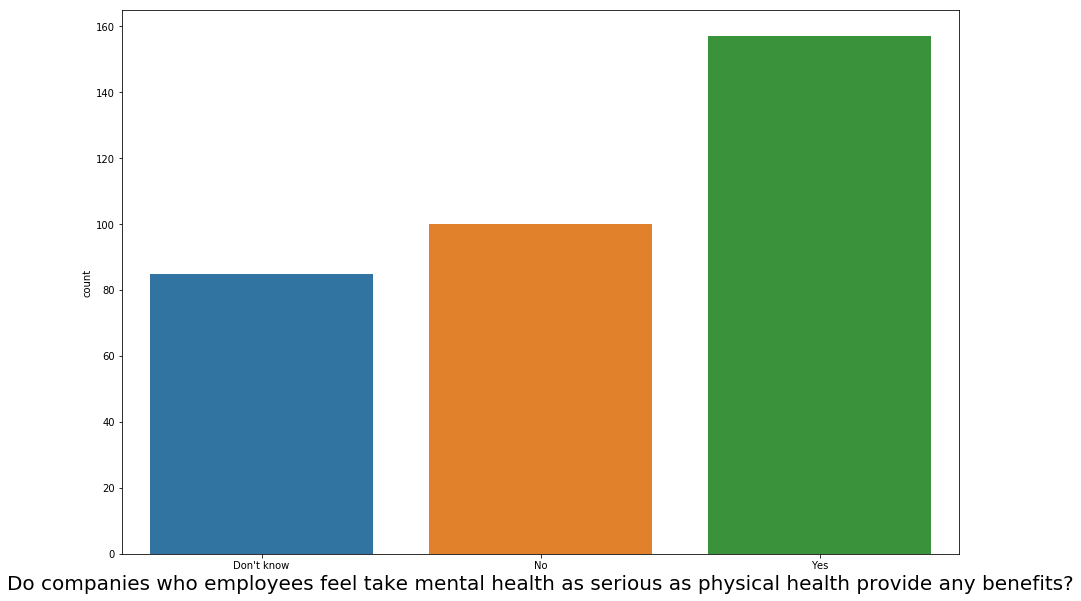

In [36]:
# If an employee feels like thier company take mental health serious they are assumed to have responded yes in the
# mental_vs_physical coulmn. So if we reduce the dataframe down to those two columns and then groupby benefits we get...
tmp = df2[["mental_vs_physical","benefits"]][df2["mental_vs_physical"]=="Yes"].groupby('benefits').count().reset_index()
tmp.columns = ['benefits','count']
plt.figure(figsize=(15,10))
ax = sns.barplot(x='benefits',y = 'count', data=tmp )
ax.set_xlabel("Do companies who employees feel take mental health as serious as physical health provide any benefits?",\
               fontsize = 20)

so of the comapnies that take mental health seriously, the majority for which information is known, provide benefits.

## Question 7 : Do companies who employees feel take mental health as serious as physical health allow employees to take leave because of mental health?

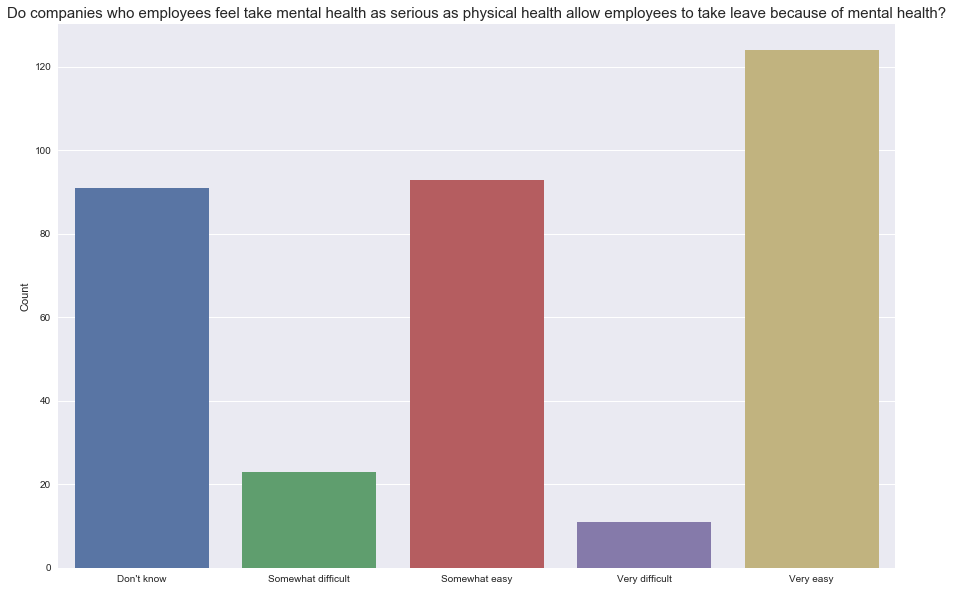

In [45]:
# If an employee feels like thier company take mental health serious they are assumed to have responded yes in the
# treatment coulmn. So if we reduce the dataframe down to those two columns and then groupby leave we get...
tmp = df2[["mental_vs_physical","leave"]][df2["mental_vs_physical"]=="Yes"].groupby('leave').count().reset_index()
tmp.columns = ['leave','count']
plt.figure(figsize=(15,10))
ax = sns.barplot(x='leave',y = 'count', data=tmp )
ax.set_title("Do companies who employees feel take mental health as serious as physical health \
allow employees to take leave because of mental health?",fontsize = 15)
ax.set_ylabel('Count')
ax.set_xlabel("")

so of the companies that take mental health seriously, the majority make it easy to take leave

## Question 8 & 9 : People with mental health who (receive/do not recieve) treatment 

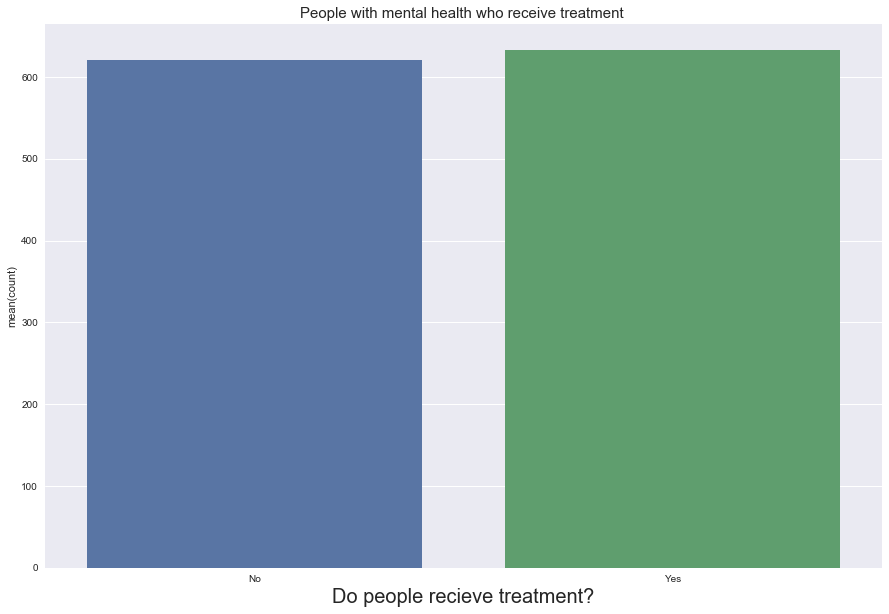

In [46]:
# If an employee is getting treatment they are assumes to have responded yes in the treatment column, if no the  no treatment.
# So if we groupby treatment we get...
tmp = df2.groupby('treatment').count().reset_index()
tmp = tmp[['treatment','Timestamp']] # select 2 columns
tmp.columns = ['treatment','count'] # rename the columns
plt.figure(figsize=(15,10))
ax = sns.barplot(x='treatment',y = 'count', data=tmp )
ax.set_title("People with mental health who receive treatment ",fontsize = 15)
ax.set_xlabel("Do people recieve treatment?",fontsize=20)

So we se that half as many people get treatment vs those that dont get treatment. For this survey the edge goes to
the people getting treatment.

## Question 10 : Does work have a part to play with employee’s mental health?

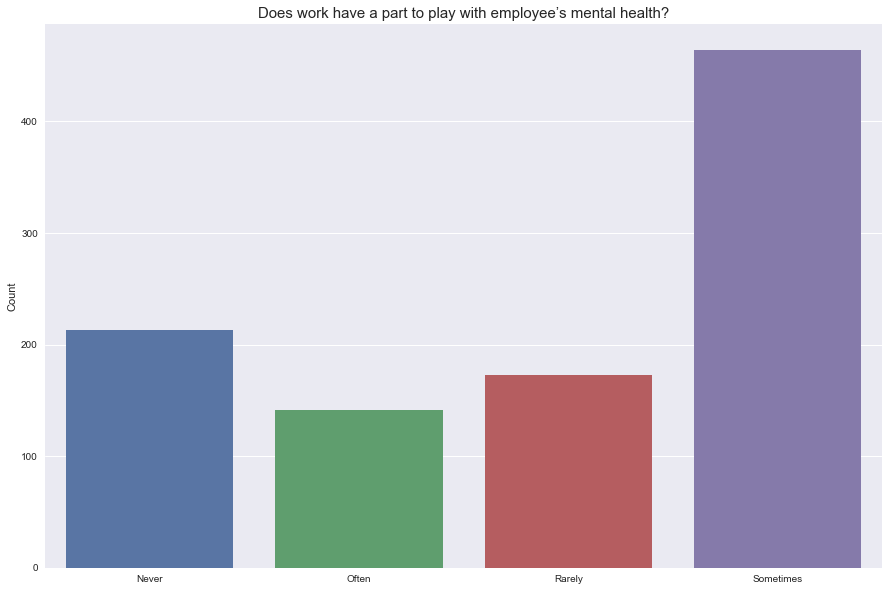

In [67]:
# if works plays a part in an employee's mental health thier response would be in the columns "work_interfere"
# lets groupby that columns and count
tmp = df2.groupby("work_interfere").count().reset_index()
plt.figure(figsize=(15,10))
ax = sns.barplot(x='work_interfere',y='Timestamp',data=tmp)
ax.set_title("Does work have a part to play with employee’s mental health?",fontsize = 15)
ax.set_ylabel('Count')
ax.set_xlabel("")

So we can resonably conclude that work does have a part to play on an employees mental health.